# Digits Classifer
---
#### 주요 모듈 import

In [78]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix # Use confusion_matrix
from sklearn.tree import DecisionTreeClassifier # Use DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier # Use RandomForestClassifier
from sklearn import svm # Use Support Vector Machine(SVM)
from sklearn.linear_model import SGDClassifier # Use Stochastic Gradient Descent Classifier (SGDClassifier)
from sklearn.linear_model import LogisticRegression # Use LogisticRegression
from sklearn.metrics import accuracy_score # 정확도 확인
import pandas as pd
import matplotlib.pyplot as plt # 이미지로 보기위해
%matplotlib inline

## 데이터 이해하기
---
지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.

- Feature Data 지정하기

- Label Data 지정하기

- Target Names 출력해 보기

- 데이터 Describe 해 보기

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
digits_data.shape: (1797, 64)
digits_data[0]: 
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


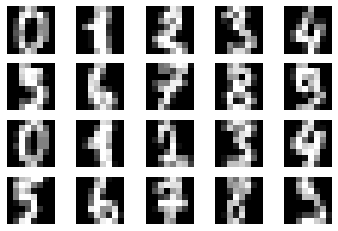

digits_label.shape: (1797,)
digits.target_names: [0 1 2 3 4 5 6 7 8 9]


In [83]:
digits = load_digits() #Load Data
print(digits.keys()) #digits Data
digits_data = digits.data
print("digits_data.shape: {}".format(digits_data.shape)) # (1797,64) 1797개의 8x8 이미지 픽셀 데이터
print("digits_data[0]: \n{}".format(digits_data[0])) # 64개 연속됨

for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()
digits_label = digits.target
print("digits_label.shape: {}".format(digits_label.shape))
print("digits.target_names: {}".format(digits.target_names))
#digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
#digits_df["label"] = digits.target

## train,test 데이터 분리
---
데이터 분리를 위해 sklearn.model_selection 사용, 추가로 shuffle 속성을 True로 함

In [80]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2,
                                                    random_state=5,
                                                    shuffle=True)

## 다양한 모델로 학습시켜보기
---
학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다. 어떤 모델이 가장 좋은 성능을 보일까요?

Decision Tree 사용해 보기

Random Forest 사용해 보기

SVM 사용해 보기

SGD Classifier 사용해 보기

Logistic Regression 사용해 보기

In [87]:
# Use DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred_DC = decision_tree.predict(X_test)
DC_accuary = accuracy_score(y_test,y_pred_DC)
print("DecisionTree accuarcy: {}".format(DC_accuary))

# Use RandomForestClassifier
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred_RF = random_forest.predict(X_test)
RF_accuary = accuracy_score(y_test,y_pred_RF)
print("RandomForestClassifier accuarcy: {}".format(RF_accuary))

# Use Support Vector Machine(SVM)
clf = svm.SVC(random_state=32)
clf.fit(X_train, y_train)
y_pred_SVM = clf.predict(X_test)
SVM_accuary = accuracy_score(y_test,y_pred_SVM)
print("Support Vector Machine accuarcy: {}".format(SVM_accuary))

# Use Stochastic Gradient Descent Classifier (SGDClassifier)
clf = SGDClassifier(loss="perceptron").fit(X_train, y_train)
y_pred_SGDC = clf.predict(X_test)
SGDC_accuary = accuracy_score(y_test,y_pred_SGDC)
print("SGDClassifier accuarcy: {}".format(SGDC_accuary))

# Use LogisticRegression
logistic_model = LogisticRegression(max_iter=3000)
clf = logistic_model.fit(X_train, y_train)
y_pred_LOGR = clf.predict(X_test)
LOGR_accuary = accuracy_score(y_test,y_pred_LOGR)
print("LogisticRegression accuarcy: {}".format(LOGR_accuary))

DecisionTree accuarcy: 0.8527777777777777
RandomForestClassifier accuarcy: 0.9666666666666667
Support Vector Machine accuarcy: 0.9777777777777777
SGDClassifier accuarcy: 0.95
LogisticRegression accuarcy: 0.9583333333333334


## Using confusion_matrix 

In [88]:
print("Use DecisionTreeClassifier")
print(classification_report(y_test, y_pred_DC))
print("Use RandomForestClassifier")
print(classification_report(y_test, y_pred_RF))
print("Use Support Vector Machine(SVM)")
print(classification_report(y_test, y_pred_SVM))
print("Use Stochastic Gradient Descent Classifier (SGDClassifier)")
print(classification_report(y_test, y_pred_SGDC))
print("Use LogisticRegression")
print(classification_report(y_test, y_pred_LOGR))

Use DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      0.91      0.96        35
           1       0.82      0.89      0.85        35
           2       0.88      0.81      0.84        36
           3       0.89      0.84      0.86        37
           4       0.85      0.72      0.78        32
           5       0.88      0.83      0.85        46
           6       0.96      0.90      0.93        30
           7       0.83      0.83      0.83        42
           8       0.78      0.84      0.81        38
           9       0.71      1.00      0.83        29

    accuracy                           0.85       360
   macro avg       0.86      0.86      0.85       360
weighted avg       0.86      0.85      0.85       360

Use RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        35
           2       0.97 

# Model evaluation
---
digits 분류기의 경우 precsion , recall 의 중요성이 명확하게 드러나지 않는다고 생각합니다

각 모델당 특이하게 Precision이나 Recall값이 현저히 떨어지는 모델은 없어 보입니다.

따라서 Precsion과 Recall의 조화평균인 F1 score와 Accuaracy를 종합적으로 판단하는게 맞다고 생각합니다.

Digits Classifier에서 SVM Model, RandomForest Model이 정확도도 높고 안정적인 Model 입니다.
